# Telecom X - Análisis de Evasión de Clientes

Descripcion

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
cliente=pd.json_normalize(df['customer'])
phone=pd.json_normalize(df['phone'])
internet=pd.json_normalize(df['internet'])
account=pd.json_normalize(df['account'])
datosIniciales=pd.concat([df['customerID'],df['Churn']],axis=1)

#🔧 Transformación





**Transformacion de clientes**

In [3]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [4]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [5]:
# Volver a cargar el DataFrame cliente justo antes de la transformación
cliente = pd.json_normalize(df['customer'])

cliente['Partner'] = cliente['Partner'].astype(str).str.strip().map({'Yes': 1, 'No': 0})
cliente['Dependents'] = cliente['Dependents'].astype(str).str.strip().map({'Yes': 1, 'No': 0})
#remplazo los valores de las columnas partner y dependents , remplazando yes  por 1 y no por 0

In [6]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3


**Transformacion de Phone**

In [7]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [8]:
phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [9]:
phone['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [10]:
columnas=['PhoneService','MultipleLines']
phone[columnas] =phone[columnas].apply(lambda x: x.map ({'Yes': 1 ,'No': 0, 'No phone service': 0 }))



In [11]:
phone.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


**Transformacion de internet **

In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [13]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [14]:
#internet[OnlineSecuruty].unique()
#internet['OnlineBackup'].unique()
#internet['DeviceProtection'].unique()
#internet['TechSupport'].unique()
#internet['StreamingTV'].unique()
internet['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
columnas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet[columnas] = internet[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))

In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   int64 
 2   OnlineBackup      7267 non-null   int64 
 3   DeviceProtection  7267 non-null   int64 
 4   TechSupport       7267 non-null   int64 
 5   StreamingTV       7267 non-null   int64 
 6   StreamingMovies   7267 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 397.5+ KB


In [17]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,0,1,0,1,1,0
1,DSL,0,0,0,0,0,1
2,Fiber optic,0,0,1,0,0,0
3,Fiber optic,0,1,1,0,1,1
4,Fiber optic,0,0,0,1,1,0


**Transformacion de cuenta **

In [18]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [19]:
account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [20]:
cant_vacios = account['Charges.Total'].str.strip().eq('').sum()
cant_vacios

np.int64(11)

In [21]:
cant_nan = account['Charges.Total'].isna().sum()
cant_nan

np.int64(0)

In [22]:
account['Charges.Total'] = pd.to_numeric(
    account['Charges.Total'].str.replace(r'[$,]', '', regex=True),
    errors='coerce'
).fillna(0)

In [23]:
account['Charges.Total']

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [24]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


In [25]:
pd.unique(account['Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [26]:
pd.unique(account['PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [27]:
account['PaperlessBilling'] = pd.to_numeric(
    account['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

/tmp/ipython-input-2368989687.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  account['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),


In [28]:
pd.unique(account['PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [29]:

account['Cuentas_Diarias'] = account['Charges.Monthly'] / 30.44
account['Cuentas_Diarias'] = account['Cuentas_Diarias'].round(2)
account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,One year,1,Mailed check,65.60,593.30,2.16
1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.90,1.81
7263,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,Two year,0,Mailed check,67.85,4627.65,2.23


**Trasnformacion de datos iniciales**

In [30]:
datosIniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [31]:
datosIniciales.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [32]:
cant_vacios = datosIniciales['Churn'].str.strip().eq('').sum()
cant_vacios

np.int64(224)

In [33]:
pd.unique(datosIniciales['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [34]:
datosIniciales['Churn'] = pd.to_numeric(
    datosIniciales['Churn'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [35]:
datosIniciales

,customerID,Churn
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,1
3,0011-IGKFF,1
4,0013-EXCHZ,1
...,...,...
7262,9987-LUTYD,0
7263,9992-RRAMN,1
7264,9992-UJOEL,0
7265,9993-LHIEB,0


#📊 Carga y análisis

In [36]:
df_definitivo = pd.concat([datosIniciales, cliente, phone, internet, account], axis=1)

In [37]:
df_definitivo.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.126155
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,0.989744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.160000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


In [38]:
df_definitivo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.81
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.23


In [39]:
df_definitivo.to_csv('df_definitivo.csv', index=False)

In [40]:
churn_contador = df_definitivo['Churn'].value_counts()


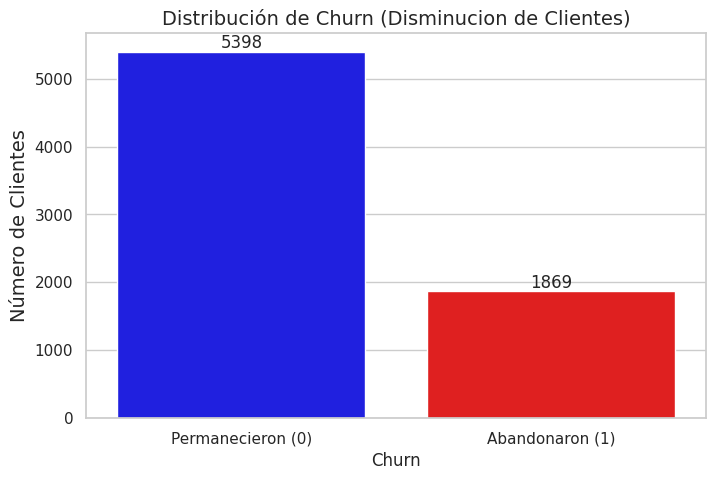

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_contador.index, y=churn_contador.values, hue= churn_contador.index, palette=["blue","red"],legend=False)
plt.title('Distribución de Churn (Disminucion de Clientes)', fontsize=14)

plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks([0, 1], ['Permanecieron (0)', 'Abandonaron (1)'])

for i, contador in enumerate(churn_contador.values):
    plt.text(i, contador + 50, str(contador), ha='center', fontsize=12)

plt.show()

In [42]:
hombres = df_definitivo[df_definitivo['gender'] == 'Male']['Churn'].value_counts()
mujeres = df_definitivo[df_definitivo['gender'] == 'Female']['Churn'].value_counts()


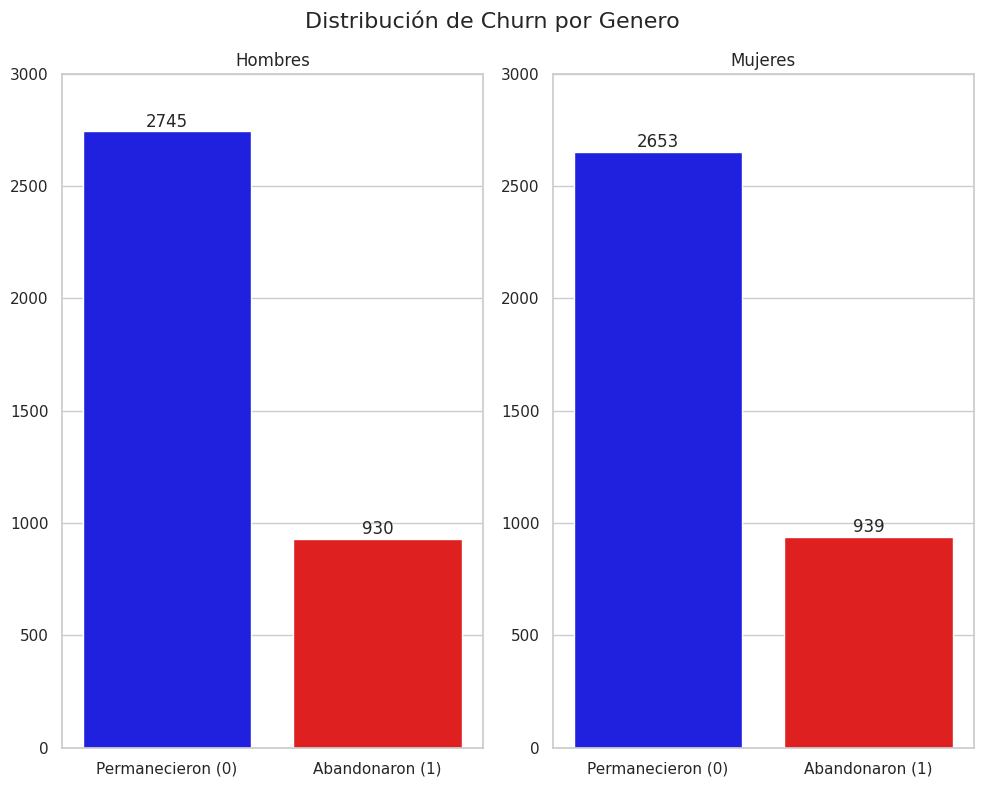

In [56]:
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
plt.suptitle('Distribución de Churn por Genero', fontsize=16)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["blue", "red"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 3000)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(hombres, ax1, 'Hombres')
plot_churn(mujeres, ax2, 'Mujeres')

plt.tight_layout()
plt.show()

In [44]:

no_senior = df_definitivo[df_definitivo['SeniorCitizen'] == 0]['Churn'].value_counts()
senior = df_definitivo[df_definitivo['SeniorCitizen'] == 1]['Churn'].value_counts()

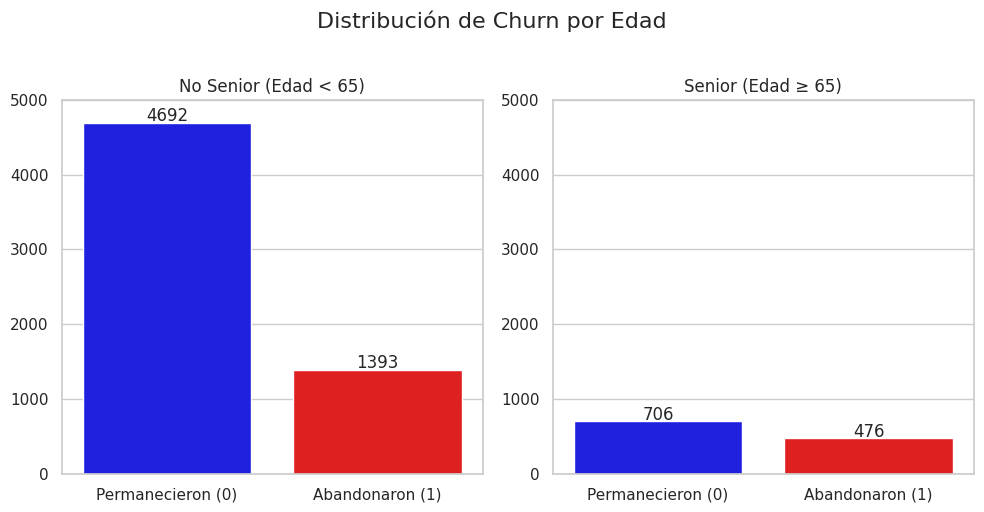

In [45]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Distribución de Churn por Edad', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["blue", "red"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 5000)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(no_senior, axs[0], 'No Senior (Edad < 65)')
plot_churn(senior, axs[1], 'Senior (Edad ≥ 65)')

plt.tight_layout()
plt.show()

In [46]:
df_definitivo['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [47]:

year = df_definitivo[df_definitivo['Contract'] == 'One year']['Churn'].value_counts()
month = df_definitivo[df_definitivo['Contract'] == 'Month-to-month']['Churn'].value_counts()
year2= df_definitivo[df_definitivo['Contract'] == 'Two year']['Churn'].value_counts()

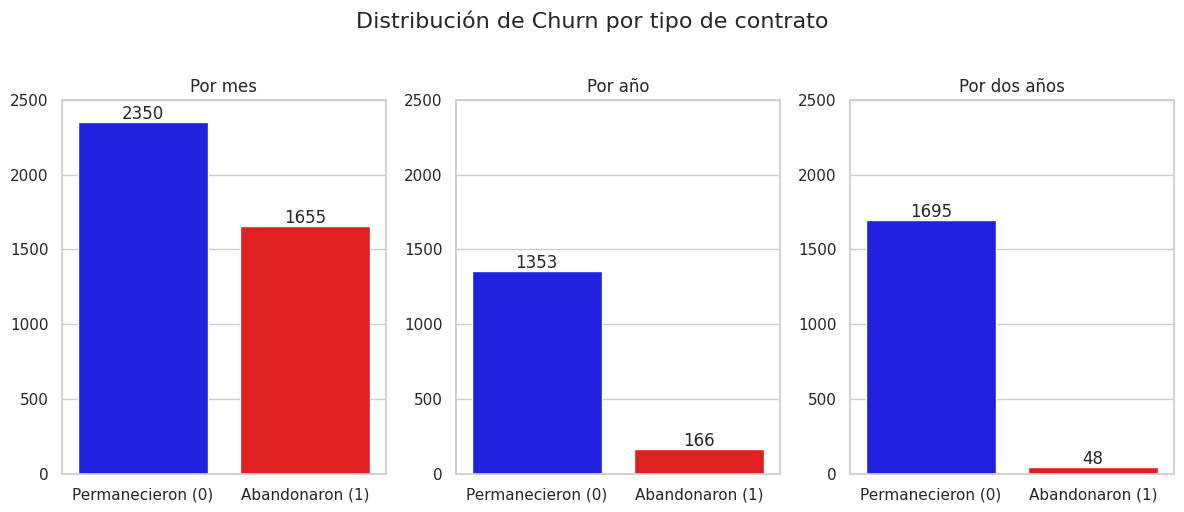

In [48]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
plt.suptitle('Distribución de Churn por tipo de contrato', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["blue", "red"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 2500)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(month, axs[0], 'Por mes')
plot_churn(year, axs[1], 'Por año')
plot_churn(year2, axs[2], 'Por dos años')

plt.tight_layout()
plt.show()

In [49]:
df_definitivo['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [50]:
cheque = df_definitivo[df_definitivo['PaymentMethod'] == 'Mailed check']['Churn'].value_counts()
cheque_electronico = df_definitivo[df_definitivo['PaymentMethod'] == 'Electronic check']['Churn'].value_counts()
Tarjeta_de_credito = df_definitivo[df_definitivo['PaymentMethod'] == 'Credit card (automatic)']['Churn'].value_counts()
Transferencia_bancaria = df_definitivo[df_definitivo['PaymentMethod'] == 'Bank transfer (automatic)']['Churn'].value_counts()

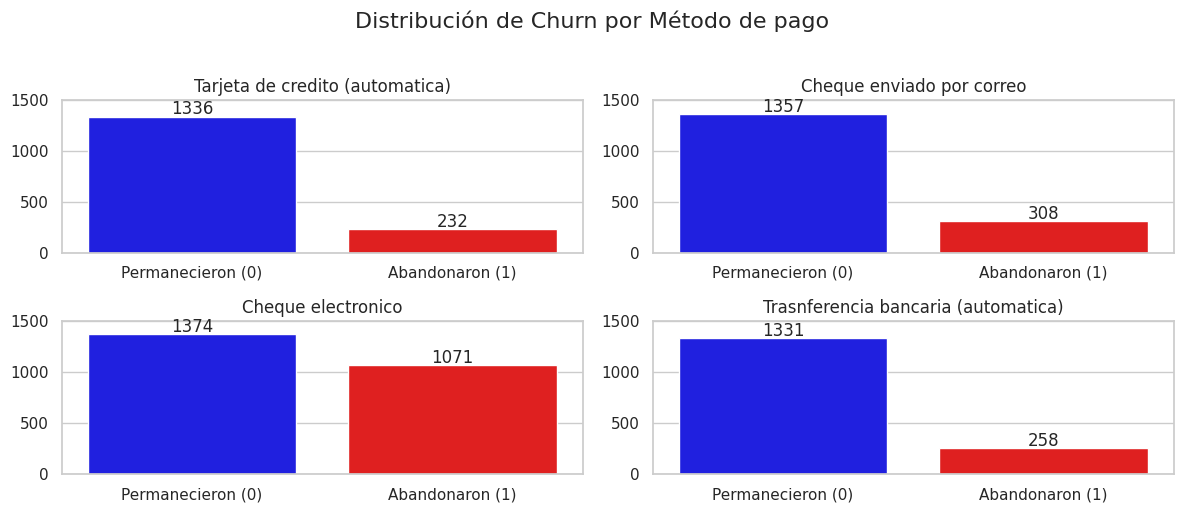

In [51]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
plt.suptitle('Distribución de Churn por Método de pago', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["blue", "red"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 1500)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(cheque, axs[0][1], 'Cheque enviado por correo')
plot_churn(cheque_electronico, axs[1][0], 'Cheque electronico')
plot_churn(Tarjeta_de_credito, axs[0][0], 'Tarjeta de credito (automatica)')
plot_churn(Transferencia_bancaria, axs[1][1], 'Trasnferencia bancaria (automatica)')


plt.tight_layout()
plt.show()

In [52]:
Gasto_total_1 = df_definitivo[df_definitivo['Churn'] == 1]['Charges.Total']
Gasto_total_0 = df_definitivo[df_definitivo['Churn'] == 0]['Charges.Total']
tiempo_De_Contrato0 = df_definitivo[df_definitivo['Churn'] == 0]['tenure']
tiempo_De_Contrato1 = df_definitivo[df_definitivo['Churn'] == 1]['tenure']

In [53]:
print("--- El gasto total  (Churn = 1) ---")
print(Gasto_total_1.describe())
print("\n--- El gasto total ,  (Churn = 0) ---")
print(Gasto_total_0.describe())

print("\n--- El tiempo de contrato,  (Churn = 1) ---")
print(tiempo_De_Contrato1.describe())
print("\n--- El tiempo de contrato  (Churn = 0) ---")
print(tiempo_De_Contrato0.describe())

--- El gasto total  (Churn = 1) ---
count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: Charges.Total, dtype: float64

--- El gasto total ,  (Churn = 0) ---
count    5398.000000
mean     2535.263977
std      2330.802193
min         0.000000
25%       564.362500
50%      1663.625000
75%      4237.275000
max      8672.450000
Name: Charges.Total, dtype: float64

--- El tiempo de contrato,  (Churn = 1) ---
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

--- El tiempo de contrato  (Churn = 0) ---
count    5398.000000
mean       37.321045
std        24.178367
min         0.000000
25%        14.000000
50%        37.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64


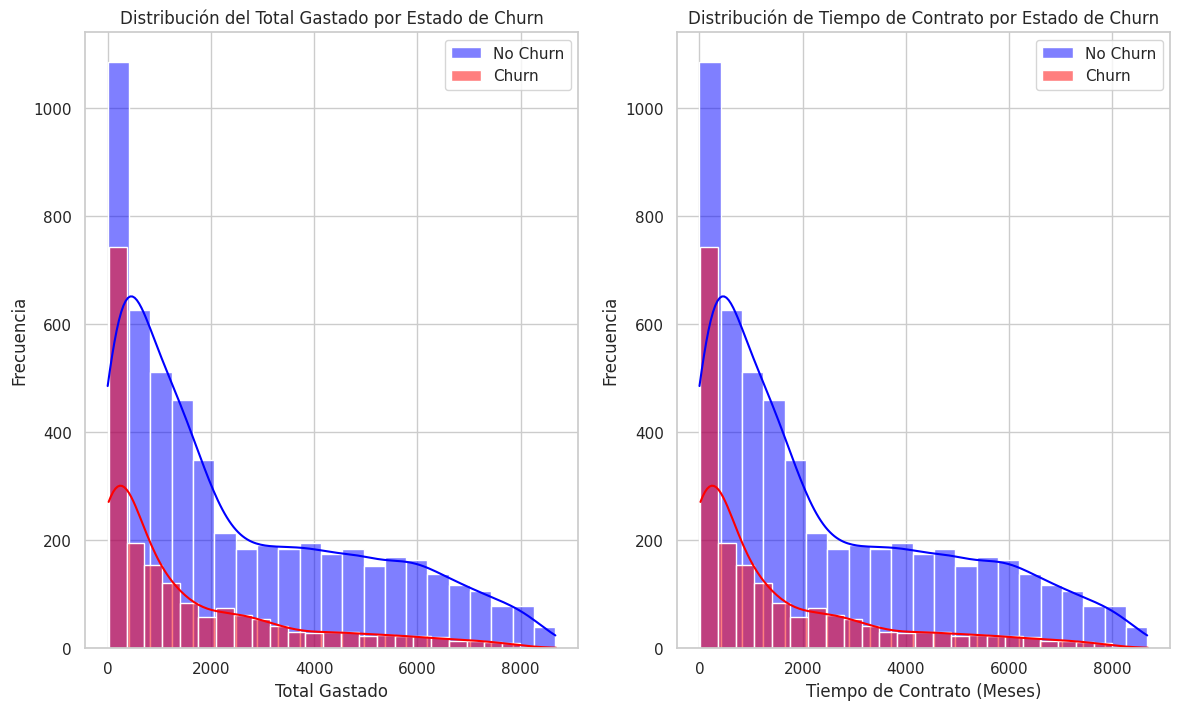

In [54]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.histplot(Gasto_total_0, color='blue', label='No Churn', kde=True)
sns.histplot(Gasto_total_1, color='red', label='Churn', kde=True)
plt.title('Distribución del Total Gastado por Estado de Churn')
plt.xlabel('Total Gastado')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(Gasto_total_0, color='blue', label='No Churn', kde=True)
sns.histplot(Gasto_total_1, color='red', label='Churn', kde=True)
plt.title('Distribución de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

/tmp/ipython-input-1957454064.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df_definitivo, palette={'0': 'blue', '1': 'red'})
/tmp/ipython-input-1957454064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_definitivo, palette={'0': 'blue', '1': 'red'})


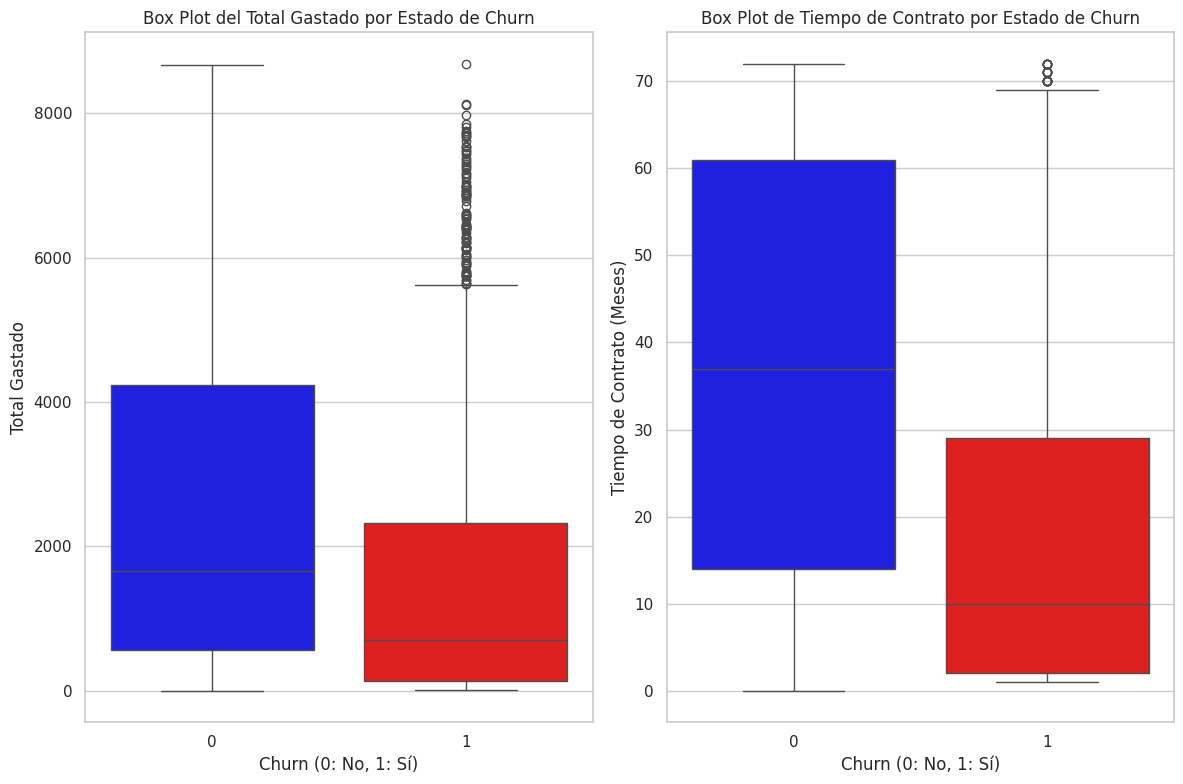

In [55]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Charges.Total', data=df_definitivo, palette={'0': 'blue', '1': 'red'})
plt.title('Box Plot del Total Gastado por Estado de Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Total Gastado')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df_definitivo, palette={'0': 'blue', '1': 'red'})
plt.title('Box Plot de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (Meses)')

plt.tight_layout()
plt.show()

#📄Informe final

# Informe Final

▶Introduccion

El objetivo  principal de este analisis es comprender la razon de evasion de clientes de la empresa Telecom X, puesto que actualmente enfrenta una gran tasa de cancelaciones de servicio, lo que impacta de manera directa en los ingresos y el crecimiento de la misma.Para resolver este desafio es fundamental identificar los factores que impulsan a los clientes dejar la compañia.

Los resultados de este informe serviran como guia para que el equipo de Data Science desarrolle modelos predictivos mas precisos y al mismo tiempo permitira desarrollar estrategias para evitar que aumente la tasa de cancelacion de servicio.





▶Limpieza y extraccion de datos

El proceso de preparacion de los datos es dundamental para asegurar la  la utilidad de la informacion. Al principio , se trabajó con un archivo JSON que requería una normalización para poder dividir su contenido en múltiples DataFrames, específicamente cinco, para una inspección individualizada.





Los pasos de limpieza fueron los siguientes
  *Normalizacion de valores categoricos: En varios DataFrames, se estandarizaron las respuestas binarias de 'Yes' y 'No' a valores numéricos de 1 y 0 respectivamente. Esta conversión facilita el análisis cuantitativo y la posterior modelización.
  *Tratamiento de datos especificos:  Se identificó la cadena "No {algo} service". Esta fue reemplazada por 0, asumiendo que es equivalente a no tener el msimo y, por lo tanto, equiparable a una respuesta 'No'.

  *Creacion de variables nuevas:Se generó una nueva columna denominada cuentas_diarias. Esta se calculó tomando la columna de cargos_mensuales, dividiéndola por el promedio de días en un mes (aproximadamente 30.44 días) y redondeando el resultado a dos decimales. Esta métrica busca ofrecer una perspectiva del gasto diario del cliente.




  *Consolidacion de los datos: Finalmente, todos los DataFrames tratados y transformados fueron unidos en un único DataFrame consolidado (df_definitivo). Esta unificación es crucial para un análisis preciso y para evitar interacciones y uniones complejas en etapas posteriores del análisis.

▶Analisis exploratorio de los datos (EDA)

  El analisis exploratorio permite identificar patrones y tendencias significativas en los datos,proporcionando una profunda comprension de los factores asociados al churn.

  1)_Vision general del churn: el estudio inicial revelo que de la base total de clientes, 5398 personas permanecieron con la empresa, mientras que 1869 clientes decidieron cancelar sus servicios (churn). Esta proporción de abandono es significativa y justifica una investigación más profunda sobre los factores que lo influyen.
  

2)_Fctores categricos y su relacion con el churn:



  *Genero : Se observo que las mujeres presentaron una mayor tasa de abadono con una diferencia de aproximadamente 9 puntos a diferencia de los hombres. Aunque esta es una tendencia, su impacto relativo podría ser menor comparado con otros factores.


  
  *Seniority
  No senior: Este segmento tiene un mayor riesgo de abandono, a pesar de que también representa una mayor cantidad de clientes que permanecen en general. Senior: Un número considerable de clientes seniors (706) permanecieron, mientras que 476 abandonaron.
   

*Contrato:El contrato de dos años muestro el menor riesgo  de abandono, lo que siginifica un mayor compromiso y lealtad por parte de estos clientes. En contraste, el contrato mensual (de por mes) presenta el mayor riesgo de abandono. A pesar de este alto riesgo, este tipo de contrato es el más popular, albergando la mayor cantidad de usuarios.



  *Metodo de pago:El cheque electrónico es el método de pago con la mayor cantidad de abandonos, sumando una preocupante cifra de 1071 abandonos. Este es un punto de atención clave para estrategias de retención. Por otro lado, los pagos realizados por tarjeta de crédito (crédito bancario) se asocian con el menor riesgo de abandono, sugiriendo una mayor estabilidad en estos clientes.


▶Analisis de variables numericas: gasto total y tiempo de contrato (tenure)


Para entender mejor la distribución de estas variables entre los grupos de churn y no churn, utilizamos estadísticas descriptivas y visualizaciones (histogramas y box plots).

Total Gastado (Charges.Total):

Estadísticas Descriptivas:

--- Total Gastado (Churn = 1) --- count 1869.000000

mean 1531.796094

std 1890.822994

min 18.850000

25% 134.500000

50% 703.550000

75% 2331.300000

max 8684.800000

--- Total Gastado (Churn = 0) --- count 5398.000000

mean 2535.263977

std 2330.802193

min 0.000000

25% 564.362500

50% 1663.625000

75% 4237.275000

max 8672.450000



**Observaciones **


Los clientes que cancelaron (Churn = 1) tienen un gasto total promedio mucho  más bajo (1531.80) y una mediana mucho menor (703.55), en comparación con los clientes que no cancelaron (promedio de $2535.26 y mediana de 1663.63). El 75% de los clientes que abandonaron gastó menos de 2331.30, un valor que es incluso inferior al 75% del gasto de los clientes que permanecieron.

**Vsualizacion de histograma **

  El siguiente histograma muestra una clara conentracion de clientes que cancelan en los rangos de menor gasto, con una curva de densidad ("kde") que alcanza su pico en valores muy bajos. Los clientes que no cancelan tienen una distribución más extendida y con picos hacia valores de gasto más altos.

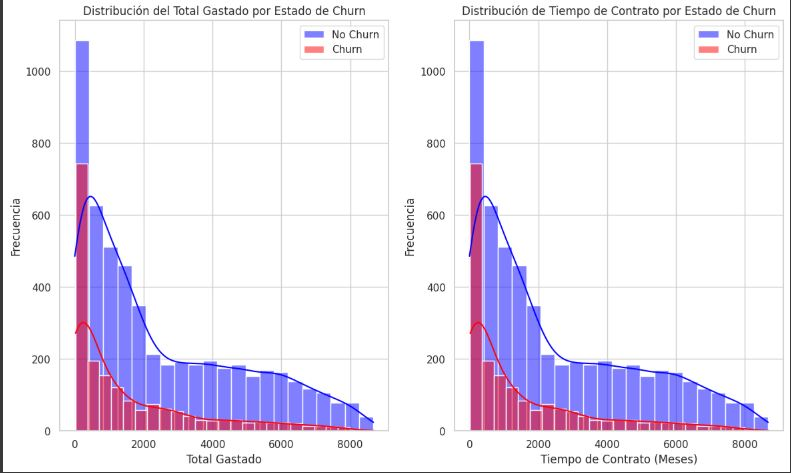


**Visualizacion  (box plot )**

El diagrama bos plot muestras que que la caja que representa el 50%  central de los datos y la mediana para los clientes que cancelan están ubicadas en un rango de valores mucho más bajo que para los que no cancelan. Hay una presencia notable de outliers de alto gasto en el grupo de churn, pero la mayoría se concentra en el rango inferior.


**Tiempo de contrato (tenure)**


Estadísticas Descriptivas:

--- Tiempo de Contrato (Churn = 1) --- count 1869.000000

mean 17.979133

std 19.531123

min 1.000000

25% 2.000000

50% 10.000000

75% 29.000000

max 72.000000

Name: tenure, dtype: float64

--- Tiempo de Contrato (Churn = 0) ---

count 5398.000000

mean 37.321045

std 24.178367

min 0.000000

25% 14.000000

50% 37.000000

75% 61.000000

max 72.000000

Name: tenure, dtype: float64

**Observaciones**
  Los clientes que cancelaron presentan un tiempo de contrato mucho mas corto(17.98 meses) y una mediana de solo 10 meses, mientras que los que no cancelaron tienen un promedio de 37.32 meses y una mediana de 37 meses. El 75% de los clientes que hicieron churn lo hicieron antes de los 29 meses, lo cual está muy por debajo de la mediana (50%) de los clientes que no abandonaron.

**Visualizacion (histograma)**

  El histrograma sobre el tiempo de contrato muestra una gran conentracion de churn en los primeros meses. con un pico pronunciado en el inicio de la distribución para los clientes que cancelan. Los clientes que permanecen tienen una distribución más uniforme, con un aumento en la frecuencia hacia los contratos más largos.

**Visualizacion (box plot)**


  El box plot de tenure destaca que la mediana del tiempo de contrato para los clientes que cancelan es realmente  baja, y su caja completa se encuentra dentro del primer cuartil de los clientes que no cancelan. Esto quiere decir  que la mayoría de los clientes que abandonan lo hacen muy temprano en su relación con la empresa.

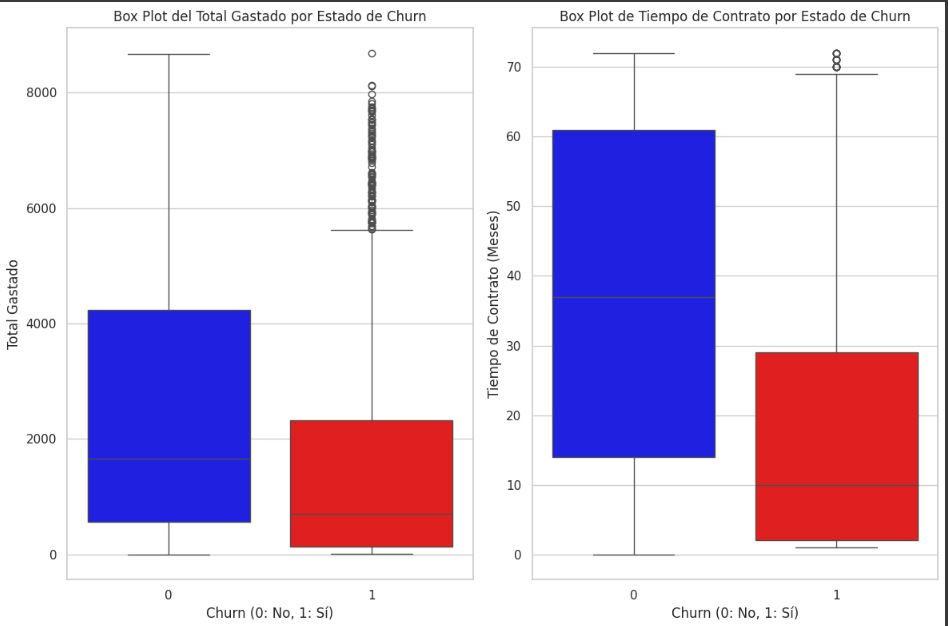

# Colclusion

  El analisis exploratorio ha revelado un perfil claro del cliente propenso al churn y los factores que lo impulsan:

       




        

  1. Clientes de alto riesgo: Los clientes con mayor riesgo de abandono suelen ser aquellos con contratos mensuales, que utilizan cheques electrónicos como método de pago, que son no seniors, y, especificamente, aquellos que han tenido un tiempo de contrato más corto y un gasto total acumulado más bajo.

  2. Importancia de los primeros meses:   El tiempo de contrato es un indicador crucial. Una gran proporción de clientes que cancelan lo hacen en los primeros 10-20 meses, lo que sugiere que la experiencia inicial del cliente es fundamental.
  

  3. Valor del cliente y churn: Los clientes que generan un menor gasto total son significativamente más propensos a abandonar. Esto quiere decir  que la inversión o el valor percibido del servicio puede ser bajo para ellos.


  4. Metodos de pago y lealtad: El método de pago no solo es una preferencia, sino un indicador de riesgo. Los usuarios de cheque electrónico muestran una  tasa de churn preocupante , a diferencia de los usuarios de tarjeta de crédito, que parecen más estables.

  5. Contratos de largo plazo como ancla : Los contratos de dos años actúan como un fuerte ancla, reduciendo drásticamente la probabilidad de churn, lo que valida la importancia de incentivar la permanencia a largo plazo.



  Estos hallazgos proporcionan una base sólida para que el equipo de Data Science pueda avanzar en la creación de modelos predictivos de churn y, a la empresa, en el desarrollo de estrategias de retención más dirigidas y efectivas, logrando asi mejores resultados para la misma.
  

# Recomendaciones
Basado en el análisis de datos, se proponen las siguientes recomendaciones estratégicas para Telecom X con el fin de reducir la tasa de evasión de clientes:

  *Foco en la experiencia del cliente nuevo en los primeros meses sobre todo :

     *Estrategia:  Implementar un programa de "Onboarding" proactivo y robusto para los clientes nuevos, especialmente en los primeros 3 a 6 meses.
     *Acciones: Seguimiento personalizado atravez de emails,canales de WhatsApp para asegurar que el cliente este satisfecho con el servicio y resolver cualquier duda o problema rápidamente.
     *Ofrecer tutoriales o guías de uso del servicio: Hacer promociones o beneficios exclusivos para los primeros meses que incentiven el uso y la permanencia.
    



*Incentivar contratos a largo plazo:
Estrategia: Reducir la proporción de clientes con contratos mensuales y migrar a contratos de mayor duración.

Acciones: Ofrecer descuentos significativos o beneficios adicionales (ej. mayor velocidad, servicios premium) a los clientes que opten por contratos de 1 o 2 años.

Comunicar de manera especifica  los beneficios económicos y de servicio de los contratos a largo plazo.

*Analisis de gestion del metodo de pago (cheque electronico)

Estrategia: Investigar las razones detrás del alto churn asociado al cheque electrónico y promover métodos de pago más estables.

Acciones: Realizar encuestas o análisis cualitativos con clientes que usen cheque electrónico para entender puntos de fricción o insatisfacción, las encuestas se pueden hacer atravez de canales de WhatsApp o paginas de Instagram.

Ofrecer incentivos para cambiar a domiciliación bancaria o tarjeta de crédito (ej. pequeños descuentos, bonificaciones).

Mejorar la experiencia de pago o comunicación para usuarios de cheque electrónico.

*Programas de Retención para Clientes de Bajo Gasto y No Seniors:
Estrategia: Diseñar ofertas y comunicaciones específicas para clientes que muestran bajo gasto o que pertenecen al segmento "no senior".

Acciones: Identificar proactivamente a los clientes con bajo gasto y ofrecerles paquetes de servicios más adecuados a sus necesidades o promociones para aumentar su valor.

Desarrollar campañas de marketing dirigidas a clientes no seniors, destacando beneficios relevantes para su perfil.

*Desarrollo de modelos predictivos:

Estrategia: Utilizar los insights extraídos para construir y refinar modelos de aprendizaje automático que sean capaces de predecir la probabilidad de churn.

Acciones: Integrar las variables Gasto Total  y Tiempo de Contrato, junto con el tipo de contrato y método de pago, como características clave en los modelos.

Establecer umbrales de riesgo para identificar clientes con alta probabilidad de churn antes de que ocurra.